In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn as sk
from __future__ import division
from sklearn.cross_validation import train_test_split
import math


C:\Users\danny\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_excel('./BioCode for Machine Learning.xlsx')

In [3]:
#Average similarity. One of the features used in Jeremy's original classifier
avsim = df['avg_Similarity']
#Classifications of species
cls = df['Classification']
#branch distance; also used by jeremy, apparently one of the better predictors
bdist = df['Distance_of_Branch']

## Simple Regression (one label at a time)

In [4]:
#How many of the classifications are known
print((cls.fillna(0) != 0).sum()/cls.size)

0.345294238261


In [5]:
#Samples where there are no NaNs
valid_samples = np.array((cls.fillna(0) != 0) * (1 - bdist.isnull()) * (1 - avsim.isnull())).astype(np.bool)

In [6]:
#How many samples are usable
valid_samples.sum(), avsim.size, valid_samples.sum()/avsim.size

(1684, 4877, 0.34529423826122618)

In [7]:
# Turning 'Indigenous' to 1, and others to 0
cls_binary = (cls == 'Indigenous')*1

In [8]:
#filter
avsim_valid, cls_valid, bdist_valid = avsim[valid_samples], cls_binary[valid_samples], bdist[valid_samples]

In [9]:
#Split into test/train
test_train_ratio = 0.9
avs_train, avs_test, cls_train, cls_test, bdist_train, bdist_test = train_test_split(avsim_valid, cls_valid, bdist_valid, test_size=test_train_ratio)

In [10]:
#Just to get an idea of test/train sizes:
avs_train.size, avs_test.size

(168, 1516)

In [11]:
from sklearn.linear_model import LogisticRegression,ElasticNet,Lasso,LinearRegression
from sklearn.metrics import zero_one_loss, mean_squared_error, mean_squared_log_error

In [12]:
clf = LinearRegression()

In [13]:
X = np.array([np.array(avs_train), np.array(bdist_train)]).T
y = cls_train
X_test = np.array([np.array(avs_test), np.array(bdist_test)]).T

In [14]:
# Making sure that class sizes are similar in test/train sets
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

(0.19047619047619047, 0.16358839050131926)

In [15]:
#LinReg
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1 #Threshold
#Prediction accuracy
print('Prediciton accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediciton accuracy: 0.836411609499
Weights: [  1.64931908e-03  -1.76773536e+00]


In [16]:
#Seems like branch distance is a much better predictor than avg sim. this matches Jeremy's observation

In [17]:
#LogReg
clf = LogisticRegression()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediciton accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediciton accuracy: 0.836411609499
Weights: [[-0.00569172 -0.40469153]]


In [18]:
#These predictions look impressive until you realize that it is possible to get 83% By just predicting 0's.

In [19]:
print('Prediciton accuracy:', np.mean((cls_test == 0)))

Prediciton accuracy: 0.836411609499


In [20]:
#What about other labels?

In [21]:
clf = Lasso()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediciton accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediciton accuracy: 0.836411609499
Weights: [ 0. -0.]


In [22]:
clf = ElasticNet()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediciton accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediciton accuracy: 0.836411609499
Weights: [ 0. -0.]


In [23]:
#invasive

In [24]:
# Turning 'Invasive' to 1, and others to 0
cls_binary = (cls == 'Invasive')*1
avsim_valid, cls_valid, bdist_valid = avsim[valid_samples], cls_binary[valid_samples], bdist[valid_samples]
#Split into test/train
test_train_ratio = 0.9
avs_train, avs_test, cls_train, cls_test, bdist_train, bdist_test = train_test_split(avsim_valid, cls_valid, bdist_valid, test_size=test_train_ratio)
X = np.array([np.array(avs_train), np.array(bdist_train)]).T
y = cls_train
X_test = np.array([np.array(avs_test), np.array(bdist_test)]).T
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

(0.27380952380952384, 0.2895778364116095)

In [25]:
#LinReg
clf = LinearRegression()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1 #Threshold
#Prediction accuracy
print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediction accuracy: 0.710422163588
Weights: [  6.66577800e-04   8.90653343e-01]


In [26]:
#LogReg
clf = LogisticRegression()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediction accuracy: 0.710422163588
Weights: [[-0.00104801  0.08288511]]


In [27]:
print('Prediction accuracy:', np.mean((cls_test == 0)))

Prediction accuracy: 0.710422163588


In [28]:
#Introduced

In [29]:
# Turning 'Introduced' to 1, and others to 0
cls_binary = (cls == 'Introduced')*1
avsim_valid, cls_valid, bdist_valid = avsim[valid_samples], cls_binary[valid_samples], bdist[valid_samples]
#Split into test/train
test_train_ratio = 0.9
avs_train, avs_test, cls_train, cls_test, bdist_train, bdist_test = train_test_split(avsim_valid, cls_valid, bdist_valid, test_size=test_train_ratio)
X = np.array([np.array(avs_train), np.array(bdist_train)]).T
y = cls_train
X_test = np.array([np.array(avs_test), np.array(bdist_test)]).T
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

(0.52380952380952384, 0.54815303430079154)

In [30]:
#LinReg
clf = LinearRegression()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1 #Threshold
#Prediction accuracy
print('Prediciton accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediciton accuracy: 0.513852242744
Weights: [ -2.05545206e-04   1.25690258e+00]


In [31]:
#LogReg
clf = LogisticRegression()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediciton accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediciton accuracy: 0.548153034301
Weights: [[-0.00065348  0.24669097]]


In [32]:
print('Prediciton accuracy:', np.mean((cls_test == 1)))

Prediciton accuracy: 0.548153034301


### In principle, one can train simple linear regression on 10% of data and get 100% accuracy. But note that we are only looking at results for ~1000 points. This is probably overfitting and we probably want a more principled approach that is robust to errors in sequencing and matching etc. Since the dataset already has information about those things, we should try to integrate it. Also, branch distance already includes a lot of preprocessing. Can we replicate its effectiveness, but with more robustness?

Spoiler: Performance decreases

## Creating a similarity graph

In [33]:
from tqdm import trange

In [34]:
seq = df['Aligned Sequence']
seq = np.array(seq.fillna('None'))
seq_arrays = [np.array([i for i in s]) for s in seq]

In [35]:
mat_size = len(seq_arrays)
sim_mat = -np.ones((mat_size, mat_size))

In [36]:
%%time
for i in trange(mat_size):
    if seq[i] != 'None':
        a = seq_arrays[i]
        for j in range(i):
            if seq[j] != 'None':
                b = seq_arrays[j]
                match = (a==b)
                valid = ((a != '-')* (b != '-')) == 1
                sim_mat[i,j] = np.mean(match[valid])
                sim_mat[j,i] = sim_mat[i,j]
        sim_mat[i,i] = 1

100%|██████████████████████████████████████████████████████████████████████████████| 4877/4877 [07:42<00:00, 10.53it/s]


Wall time: 7min 43s


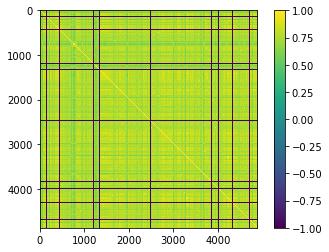

In [38]:
plt.imshow(sim_mat)
plt.colorbar()

In [82]:
# np.save('sim_mat.npy', sim_mat)


(4639, 4639)


In [40]:
valid_idx = np.array([i for i in range(len(seq)) if seq[i] != 'None'])

In [41]:
valid_idx.size, len(seq)

(4639, 4877)

In [42]:
valid_mat = sim_mat[valid_idx][:, valid_idx]

In [43]:
sim_mat.shape, valid_mat.shape

((4877, 4877), (4639, 4639))

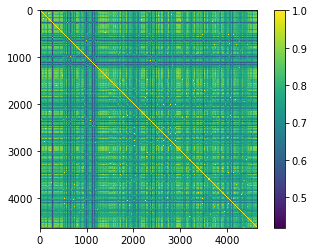

In [44]:
plt.imshow(valid_mat)
plt.colorbar()

In [45]:
valid_mat.min(), valid_mat.max()

(0.41873278236914602, 1.0)

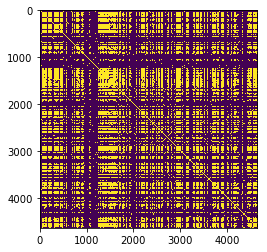

In [46]:
plt.imshow(valid_mat > 0.8)

In [47]:
## Most sequences are more than 80% similar to others
## Also, lots of clustering

In [48]:
%%time
u,s,v = np.linalg.svd(valid_mat, full_matrices=0)

Wall time: 44.3 s


In [49]:
# np.save('u.npy', u)
# np.save('s.npy', s)
# np.save('v.npy', v)

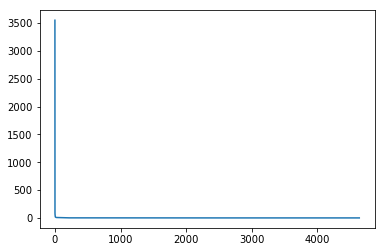

In [50]:
plt.plot(s)

In [51]:
s[:10]

array([ 3551.81075588,    88.06784844,    62.77499338,    44.84708554,
          32.04235187,    24.1162295 ,    17.3104206 ,    16.30857238,
          14.87169289,    14.16184307])

In [52]:
# This is basically a rank 1 matrix

In [53]:
rank = 10
approx = u[:,:rank].dot(np.diag(s[:rank])).dot(v[:rank])
residues = approx - valid_mat
errors = (residues/valid_mat)

(array([  1.95000000e+02,   2.25000000e+02,   4.74500000e+03,
          1.89330000e+04,   4.50330000e+04,   9.93745800e+06,
          1.15052480e+07,   8.45000000e+03,   2.80000000e+01,
          6.00000000e+00]),
 array([-0.41957162, -0.34972467, -0.27987772, -0.21003078, -0.14018383,
        -0.07033688, -0.00048994,  0.06935701,  0.13920396,  0.20905091,
         0.27889785]),
 <a list of 10 Patch objects>)

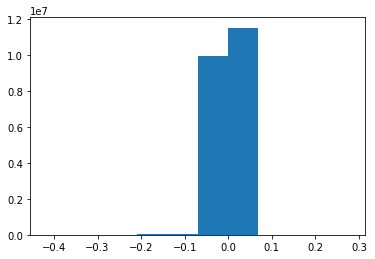

In [54]:
plt.hist(errors.flatten())

(array([  1.00000000e+00,   4.00000000e+00,   1.00000000e+01,
          3.15000000e+02,   1.64744000e+05,   2.13539440e+07,
          7.11000000e+02,   4.23000000e+02,   1.53000000e+02,
          1.60000000e+01]),
 array([-0.01478794, -0.01193264, -0.00907734, -0.00622204, -0.00336673,
        -0.00051143,  0.00234387,  0.00519918,  0.00805448,  0.01090978,
         0.01376508]),
 <a list of 10 Patch objects>)

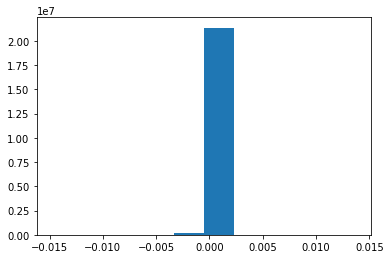

In [55]:
rank = 1000
approx_1000 = u[:,:rank].dot(np.diag(s[:rank])).dot(v[:rank])
errors = ((approx_1000 - valid_mat)/valid_mat)
plt.hist(errors.flatten())

In [94]:
print(approx_1000.shape)

(4639, 4639)


In [56]:
#Time to fit a linear regression on these approximations and residues

In [57]:
#index of valid training points in valid_mat
valid_idx = list(valid_idx)
valid_mat_idx = [valid_idx.index(i) for i in np.where(valid_samples)[0] if i in valid_idx]

In [88]:
print(valid_mat)

[[ 1.          0.75342466  0.78713629 ...,  0.80980392  0.77777778
   0.85692542]
 [ 0.75342466  1.          0.75616438 ...,  0.75342466  0.70136986
   0.74794521]
 [ 0.78713629  0.75616438  1.         ...,  0.74852652  0.75957121
   0.77641654]
 ..., 
 [ 0.80980392  0.75342466  0.74852652 ...,  1.          0.72745098
   0.77647059]
 [ 0.77777778  0.70136986  0.75957121 ...,  0.72745098  1.          0.78234399]
 [ 0.85692542  0.74794521  0.77641654 ...,  0.77647059  0.78234399  1.        ]]


In [62]:
mat = approx[valid_mat_idx]
res_mat = residues[valid_mat_idx]
print(mat.shape, res_mat.shape)

(1684, 4639) (1684, 4639)


In [65]:
from sklearn.svm import SVC

In [ ]:
# 10/18

c = 1e15
avg_score = []

for _ in range(2):
    res_mat_shuff, cls_valid_shuff = sk.utils.shuffle(approx[valid_mat_idx], cls_valid, random_state=0)

    cls_train, cls_test, res_train, res_test = train_test_split(cls_valid_shuff, res_mat_shuff, test_size=0.2)

    print(len(cls_train), len(cls_test))

    X = res_train
    y = cls_train
    X_test = res_test

    clf = SVC(C=c, kernel='poly', degree=2, coef0=0)

    clf.fit(X, y)

    predict = clf.predict(X_test)

    # print(predict == np.array(cls_test))

    score = np.mean((predict == np.array(cls_test))*1)
    avg_score.append(score)

print(avg_score, np.mean(avg_score))

In [71]:
# cross validation method
# SVM
# tricks: shuffling data, cross validation, balanced classes, hyperparam tuning

scores = []
param_vals = []
c = 1e14

# shuffle the data
res_mat_shuff, cls_valid_shuff = sk.utils.shuffle(res_mat, cls_valid, random_state=0)

cls_train, cls_test, res_train, res_test = train_test_split(cls_valid_shuff, res_mat_shuff, test_size=0.33)

X = res_train
y = cls_train
X_test = res_test
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

c = 10*c
clf = SVC(C=c,kernel='poly', degree=2, coef0=0) #, gamma=i)

clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
score = np.mean((prediction == np.array(cls_test))*1)

# score = sk.cross_validation.cross_val_score(clf, res_mat_shuff, cls_valid_shuff, cv=6) #, n_jobs=-1)
print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))

#Coefficients used by the classifier
scores.append(score)
param_vals.append(i)

print(scores)

mn_scores = [np.mean(score) for score in scores]

print('mean scores:', mn_scores)

Prediction accuracy: 0.987410071942
[0.98741007194244601]
mean scores: [0.98741007194244601]


In [66]:
# cross validation method
# SVM
scores = []
c_vals = []
c = 1e7

# shuffle the data
cls_train, cls_test, res_train, res_test = train_test_split(cls_valid_shuff, res_mat_shuff, test_size=0.2)

res_mat_shuff, cls_valid_shuff = sk.utils.shuffle(res_mat, cls_valid, random_state=0)

for i in range(8):
    X = res_train
    y = cls_train
    X_test = res_test
    cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

    c = 10*c
    clf = SVC(C=c,kernel='poly')
    # clf.fit(X, y)
    # prediction = (clf.predict(X_test) > 0.5)*1
    # Prediction accuracy
    # score = np.mean((prediction == np.array(cls_test))*1)

    score = sk.cross_validation.cross_val_score(clf, res_mat_shuff, cls_valid_shuff, cv=5, n_jobs=-1)
    # print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
    #Coefficients used by the classifier
    scores.append(score)
    c_vals.append(math.log(c, 10))

print(scores)

mn_scores = [np.mean(score) for score in scores]

print('mean scores:', mn_scores)

plt.plot(c_vals, mn_scores)
plt.xlabel('log C-value')
plt.ylabel('acc')
plt.title('SVC, poly')
plt.show()

KeyboardInterrupt: 

[array([ 0.9893617 ,  0.98220641,  0.98220641,  0.97857143,  0.99285714,
        0.99285714])]
mean scores: [0.98634337130021243]


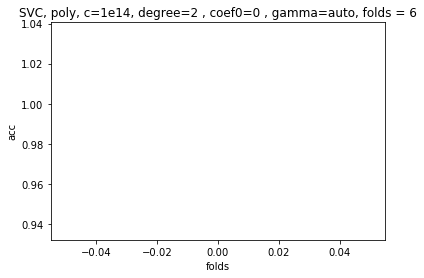

In [67]:
# cross validation method
# SVM

# tricks: shuffling data, cross validation, balanced classes, hyperparam tuning

scores = []
param_vals = []
c = 1e14

# shuffle the data
res_mat_shuff, cls_valid_shuff = sk.utils.shuffle(res_mat, cls_valid, random_state=0)



# for i in np.logspace(0.01,1,5):
for i in range(1):
    X = res_train
    y = cls_train
    X_test = res_test
    cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

    c = 10*c
    clf = SVC(C=c,kernel='poly', degree=2, coef0=0) #, gamma=i)
    # clf.fit(X, y)
    # prediction = (clf.predict(X_test) > 0.5)*1
    #Prediction accuracy
    # score = np.mean((prediction == np.array(cls_test))*1)

    score = sk.cross_validation.cross_val_score(clf, res_mat_shuff, cls_valid_shuff, cv=6) #, n_jobs=-1)
    # print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
    #Coefficients used by the classifier
    scores.append(score)
    param_vals.append(i)

print(scores)

mn_scores = [np.mean(score) for score in scores]

print('mean scores:', mn_scores)

plt.plot(param_vals, mn_scores)
plt.xlabel('folds')
plt.ylabel('acc')
plt.title('SVC, poly, c=1e14, degree=2 , coef0=0 , gamma=auto, folds = 6')
plt.show()

In [37]:
# cross validation method
# SVM
# tricks: shuffling data, cross validation, balanced classes, hyperparam tuning

scores = []
param_vals = []
c = 1e14

# shuffle the data
res_mat_shuff, cls_valid_shuff = sk.utils.shuffle(res_mat, cls_valid, random_state=0)

X = res_train
y = cls_train
X_test = res_test
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

c = 10*c
clf = SVC(C=c,kernel='poly', degree=2, coef0=0) #, gamma=i)
# clf.fit(X, y)
# prediction = (clf.predict(X_test) > 0.5)*1
# Prediction accuracy
# score = np.mean((prediction == np.array(cls_test))*1)

score = sk.cross_validation.cross_val_score(clf, res_mat_shuff, cls_valid_shuff, cv=6) #, n_jobs=-1)
# print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
scores.append(score)
param_vals.append(i)

print(scores)

mn_scores = [np.mean(score) for score in scores]

print('mean scores:', mn_scores)

# plt.plot(param_vals, mn_scores)
# plt.xlabel('folds')
# plt.ylabel('acc')
# plt.title('SVC, poly, c=1e14, degree=2 , coef0=0 , gamma=auto, folds = 6')
# plt.show()

NameError: name 'res_mat' is not defined

In [203]:
res_mat_shuff, cls_valid_shuff = sk.utils.shuffle(res_mat, cls_valid, random_state=0)

test_train_ratio = 5/6. #Use only 10% of the data for training
mat_train, mat_test, cls_train, cls_test, res_train, res_test =  train_test_split(mat, cls_valid_shuff, res_mat_shuff, test_size=test_train_ratio)

In [204]:
print(mat_train.shape, mat_test.shape)

(280, 4639) (1404, 4639)


In [136]:
# Log reg
X = mat_train
y = cls_train
X_test = mat_test
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

clf = LogisticRegression()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediction accuracy: 0.600950118765
Weights: [[-0.01194925 -0.04816665 -0.00654827 ..., -0.05313172 -0.05211375
   0.00112615]]


Prediction accuracy: 0.926365795724
Weights: [-0.01961024  0.30661765  0.14236209 ...,  0.90063062  0.71456009
  1.55218664]


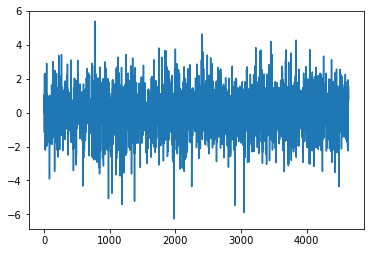

In [138]:
# Log reg
X = res_train
y = cls_train
X_test = res_test
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

clf = LinearRegression()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)
plt.plot(clf.coef_.T)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Prediction accuracy: 0.605700712589


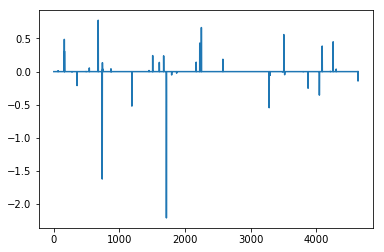

In [139]:
# Lasso
X = mat_train
y = cls_train
X_test = mat_test
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

clf = Lasso(alpha=1e-5)
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
plt.plot(clf.coef_.T)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Prediction accuracy: 0.928741092637


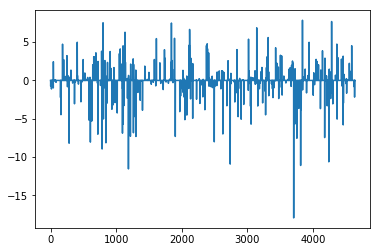

In [140]:
# Lasso
X = res_train
y = cls_train
X_test = res_test
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

clf = Lasso(alpha=1e-5)
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
plt.plot(clf.coef_.T)

In [ ]:
X = res_train
y = cls_train
X_test = res_test
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

clf = Lasso(alpha=1e-5)
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
plt.plot(clf.coef_.T)

In [128]:
from sklearn.svm import SVC

[0.51543942992874114, 0.51543942992874114, 0.51543942992874114, 0.51543942992874114, 0.51543942992874114, 0.51543942992874114, 0.60570071258907365, 0.80997624703087889, 0.92517814726840852, 0.94299287410926369, 0.94299287410926369, 0.94299287410926369, 0.94299287410926369, 0.94299287410926369, 0.94299287410926369]


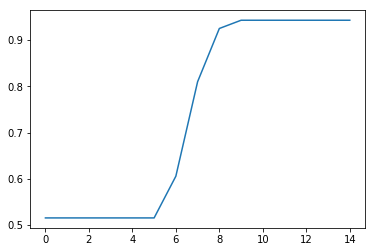

In [150]:
# SVM
def SVC_res():
    scores = []
    c_vals = []
    c = 1e3
    for i in range(15):
        X = res_train
        y = cls_train
        X_test = res_test
        cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

        c = 10*c
        clf = SVC(C=c,kernel='poly')
        clf.fit(X, y)
        prediction = (clf.predict(X_test) > 0.5)*1
        #Prediction accuracy
        score = np.mean((prediction == np.array(cls_test))*1)
        # print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
        #Coefficients used by the classifier
        scores.append(score)

    print(scores)

    plt.plot(scores)
    plt.show()
    
SVC_res()

[0.91805225653206646, 0.91805225653206646, 0.91805225653206646, 0.91805225653206646, 0.91805225653206646, 0.91805225653206646, 0.91805225653206646, 0.91805225653206646, 0.91805225653206646, 0.91805225653206646, 0.91805225653206646, 0.91805225653206646, 0.91805225653206646, 0.91805225653206646, 0.91805225653206646]


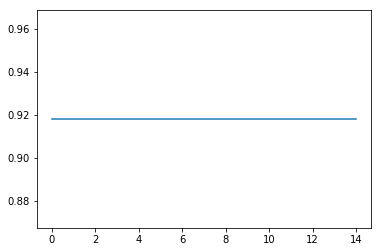

In [157]:
# SVM
def SVC_res():
    scores = []
    c = 1e1
    for i in range(15):
        X = res_train
        y = cls_train
        X_test = res_test
        cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

        c = 10*c
        clf = SVC(C=c,kernel='linear')
        clf.fit(X, y)
        prediction = (clf.predict(X_test) > 0.5)*1
        #Prediction accuracy
        score = np.mean((prediction == np.array(cls_test))*1)
        # print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
        #Coefficients used by the classifier
        scores.append(score)

    print(scores)

    plt.plot(scores)
    plt.show()
    
SVC_res()

In [206]:
X = res_train
y = cls_train
X_test = res_test
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

clf = SVC(C=1e14,kernel='poly', degree=3, coef0=0)
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
# score = np.mean((prediction == np.array(cls_test))*1)
print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier


Prediction accuracy: 0.85754985755


In [ ]:
# Adjusting the hyperparams (matrix rank, C for SVM, etc.) easily gives accuracies anywhere between 60-90
# Depending on the method, performance depends highly on the number of data points used.
# One next step would be to find something that is reasonably robust to training set size.